In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import (accuracy_score, auc, average_precision_score,
                             classification_report, confusion_matrix, 
                             precision_recall_curve, precision_score, 
                             recall_score, roc_curve)
import kds
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array


# Animal vs No Animal

In [861]:
test = pd.read_pickle('ArchivosUtiles/testingAnimal.pkl')

In [862]:
X_test = test['Imagen']
y_test = test['Animal']

In [863]:
X_test_tf = tf.convert_to_tensor(np.array([img_to_array(img) for img in X_test]))

In [864]:
modelVGG16 = load_model('ModelosFinales/modeloAnimalVGG16.h5')
modelIV3 = load_model('ModelosFinales/modeloAnimalIV3.h5')
modelRN50 = load_model('ModelosFinales/modeloAnimalRN50.h5')

## Model VGG16

In [865]:
y_probaVGG16 = modelVGG16.predict(X_test_tf)
y_predVGG16 = (y_probaVGG16 >= 0.5).astype(int)

38/38 [==============================] - 71s 2s/step


In [866]:
# Calculamos Accuracy
accuracyVGG16 = accuracy_score(y_test, y_predVGG16)
print(f"Accuracy: {accuracyVGG16}")

# Calculamos Recall
recallVGG16 = recall_score(y_test,  y_predVGG16, pos_label=1, average='binary')
print(f"Recall: {recallVGG16}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predVGG16).ravel()
specificityVGG16 = tn / (tn + fp)
print(f"Specificity: {specificityVGG16}")
# 0.9753086419753086

Accuracy: 0.9654591406908172
Recall: 0.967741935483871
Specificity: 0.9629629629629629


In [867]:
# Calcular average precision
apVGG16 = average_precision_score(y_test, y_probaVGG16)

print("Average Precision (AP):", apVGG16)

Average Precision (AP): 0.9835940006174747


In [868]:
print(classification_report(y_test, y_predVGG16))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       567
           1       0.97      0.97      0.97       620

    accuracy                           0.97      1187
   macro avg       0.97      0.97      0.97      1187
weighted avg       0.97      0.97      0.97      1187



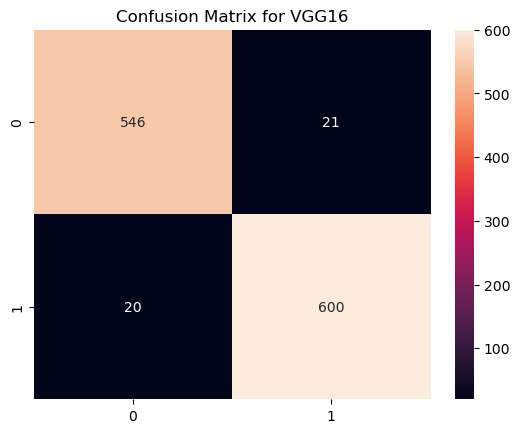

In [869]:
confusion_vgg16 = confusion_matrix(y_test, y_predVGG16)
sns.heatmap(confusion_vgg16, annot=True, fmt='g')  
plt.title('Confusion Matrix for VGG16')
plt.show()

## Model Inception V3

In [67]:
y_probaIV3 = modelIV3.predict(X_test_tf)
y_predIV3 = (y_probaIV3 >= 0.5).astype(int)

38/38 [==============================] - 12s 317ms/step


In [68]:
# Calculamos Accuracy
accuracyIV3 = accuracy_score(y_test, y_predIV3)
print(f"Accuracy: {accuracyIV3}")

# Calculamos Recall
recallIV3 = recall_score(y_test, y_predIV3, pos_label=1, average='binary')
print(f"Recall: {recallIV3}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predIV3).ravel()
specificityIV3 = tn / (tn + fp)
print(f"Specificity: {specificityIV3}")

Accuracy: 0.9604043807919124
Recall: 0.9854838709677419
Specificity: 0.9329805996472663


In [69]:
# Calcular average precision
apIV3 = average_precision_score(y_test, y_probaIV3)

print("Average Precision (AP):", apIV3)

Average Precision (AP): 0.966844633225649


In [70]:
print(classification_report(y_test, y_predIV3))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       567
           1       0.94      0.99      0.96       620

    accuracy                           0.96      1187
   macro avg       0.96      0.96      0.96      1187
weighted avg       0.96      0.96      0.96      1187



## Model ResNet 50

In [71]:
y_probaRN50 = modelRN50.predict(X_test_tf)
y_predRN50 = (y_probaRN50 >= 0.01).astype(int)

38/38 [==============================] - 25s 620ms/step


In [72]:
# Calculamos Accuracy
accuracyRN50 = accuracy_score(y_test, y_predRN50)
print(f"Accuracy: {accuracyRN50}")

# Calculamos Recall
recallRN50 = recall_score(y_test, y_predRN50, pos_label=1, average='binary')
print(f"Recall: {recallRN50}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predRN50).ravel()
specificityRN50 = tn / (tn + fp)
print(f"Specificity: {specificityRN50}")

Accuracy: 0.966301600673968
Recall: 0.9887096774193549
Specificity: 0.9417989417989417


In [73]:
# Calcular average precision
apRN50 = average_precision_score(y_test, y_probaRN50)

print("Average Precision (AP):", apRN50)

Average Precision (AP): 0.9829587558124374


In [74]:
print(classification_report(y_test, y_predRN50))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       567
           1       0.95      0.99      0.97       620

    accuracy                           0.97      1187
   macro avg       0.97      0.97      0.97      1187
weighted avg       0.97      0.97      0.97      1187



## Graficos

In [14]:
colores = [ '#2B3B52', '#355028', '#907766', '#25401B', '#FDFBF8']

In [76]:
# Suponiendo que tienes listas con precision, recall, F1 para cada modelo
accuracys = [accuracyVGG16, accuracyIV3, accuracyRN50]
recalls = [recallVGG16, recallIV3, recallRN50]
specificitys = [specificityVGG16, specificityIV3, specificityRN50]
aps = [apVGG16, apIV3, apRN50]

labels = ['VGG16', 'InceptionV3', 'ResNet50']

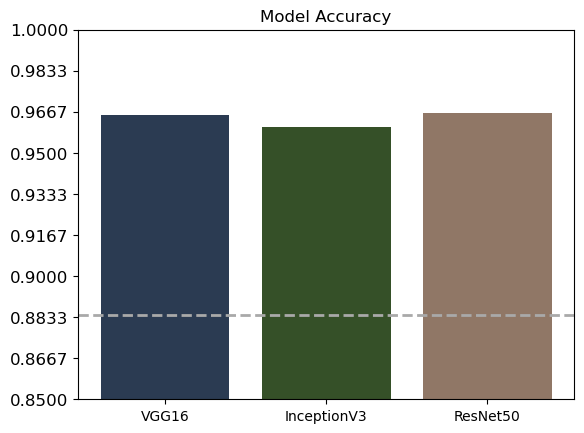

In [81]:
plt.bar(labels, accuracys, color=colores[0:3])
plt.axhline(y=0.8843, color='darkgrey', linestyle='dashed', linewidth=2)
plt.ylim([0.85, 1]) 
plt.yticks(np.linspace(0.85, 1, 10), fontsize=12) 
plt.title('Model Accuracy')
plt.show()

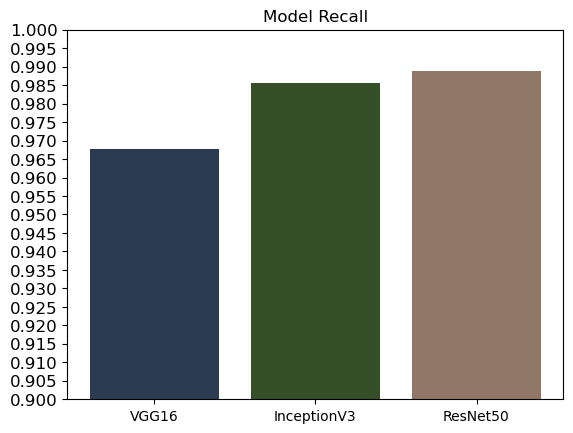

In [ ]:
plt.bar(labels, recalls, color=colores[0:3])
plt.title('Model Recall')
plt.ylim([0.90, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.90, 1, 21), fontsize=12) 
plt.show()

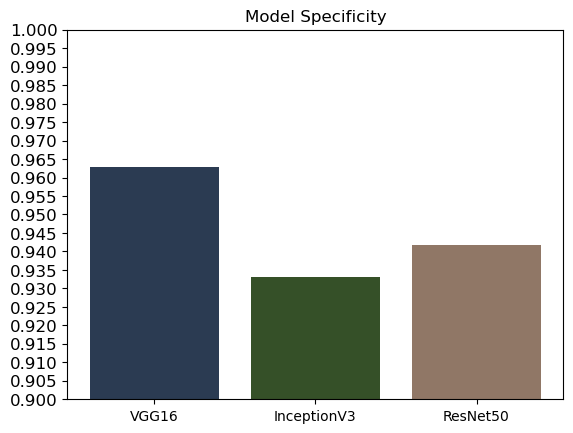

In [ ]:
plt.bar(labels, specificitys, color=colores[0:3])
plt.title('Model Specificity')
plt.ylim([0.90, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.90, 1, 21), fontsize=12) 
plt.show()

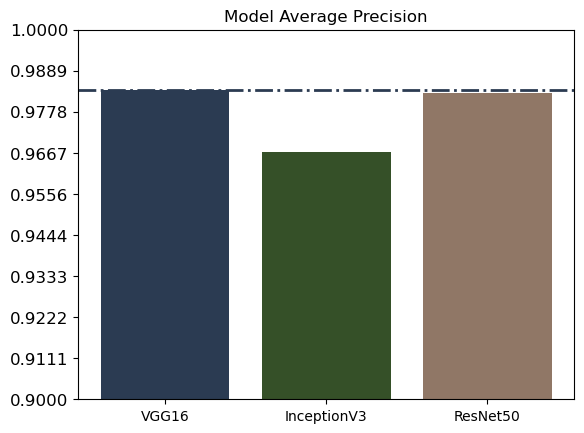

In [86]:
plt.bar(labels, aps, color=colores[0:3])
plt.title('Model Average Precision')
plt.axhline(y=max(aps), color=colores[0], linestyle='-.', linewidth=2)
plt.ylim([0.90, 1])  
plt.yticks(np.linspace(0.90, 1,10), fontsize=12) 
plt.show()

In [ ]:
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_test, y_predVGG16)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)

fpr_IV3, tpr_IV3, _ = roc_curve(y_test, y_predIV3)
roc_auc_IV3 = auc(fpr_IV3, tpr_IV3)

fpr_RN50, tpr_RN50, _ = roc_curve(y_test, y_predRN50)
roc_auc_RN50 = auc(fpr_RN50, tpr_RN50)

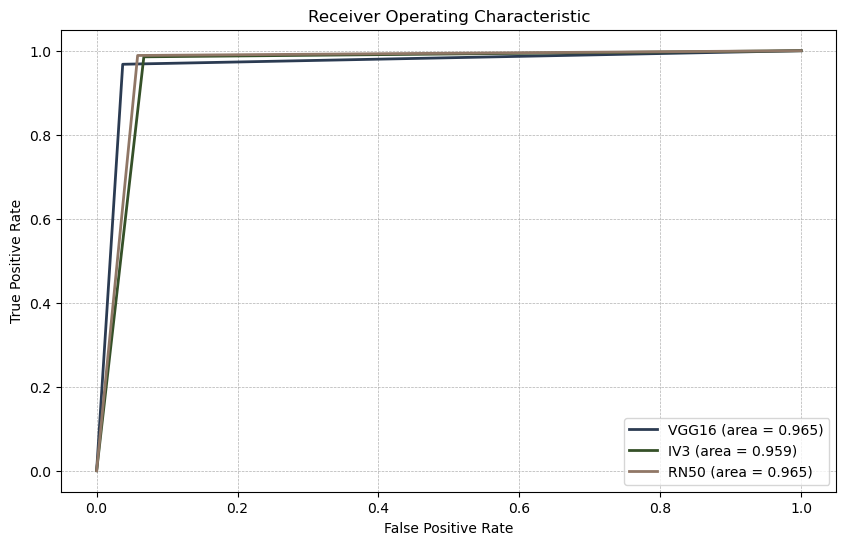

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_vgg16, tpr_vgg16, color=colores[0], label='VGG16 (area = %0.3f)' % roc_auc_vgg16, linewidth=2)
plt.plot(fpr_IV3, tpr_IV3, color=colores[1], label='IV3 (area = %0.3f)' % roc_auc_IV3, linewidth=2)
plt.plot(fpr_RN50, tpr_RN50, color=colores[2], label='RN50 (area = %0.3f)' % roc_auc_RN50, linewidth=2)  # Nota que corregí el área de RN50 que anteriormente tenía el valor de IV3

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')  # Etiqueta para el eje x
plt.ylabel('True Positive Rate')   # Etiqueta para el eje y
plt.legend(loc="lower right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Añado una rejilla para mejor visibilidad
plt.show()

In [ ]:
precision_vgg16, recall_vgg16, _ = precision_recall_curve(y_test, y_predVGG16)
pr_auc_vgg16 = auc(recall_vgg16, precision_vgg16)

precision_IV3, recall_IV3, _ = precision_recall_curve(y_test, y_predIV3)
pr_auc_IV3 = auc(recall_IV3, precision_IV3)

precision_RN50, recall_RN50, _ = precision_recall_curve(y_test, y_predRN50)
pr_auc_RN50 = auc(recall_RN50, precision_RN50)

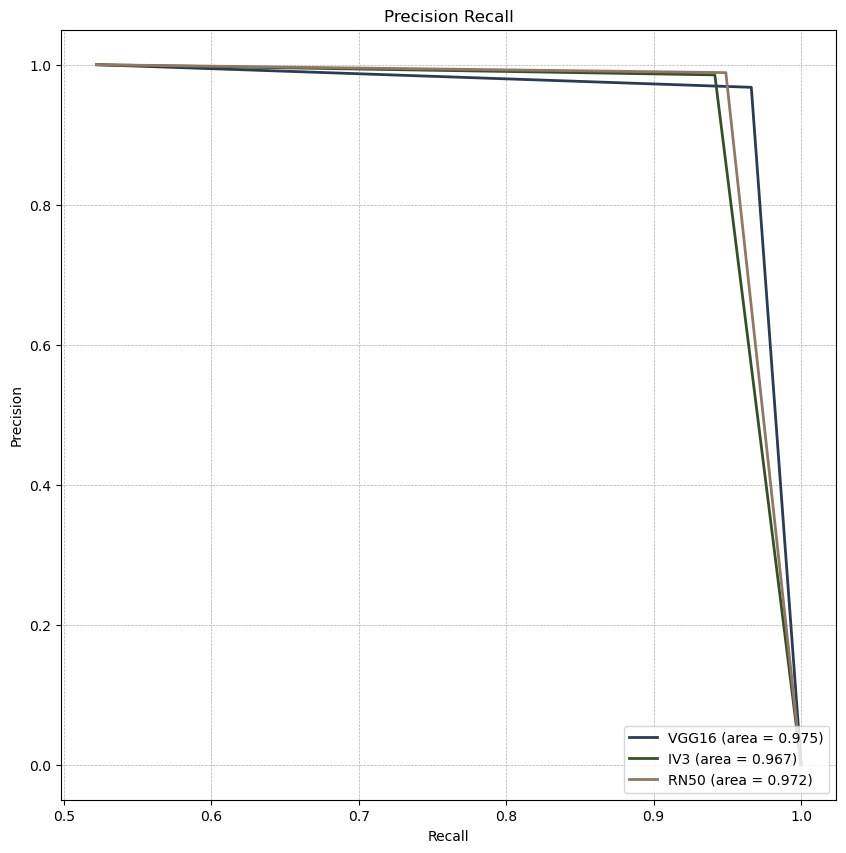

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(precision_vgg16, recall_vgg16, color=colores[0], label='VGG16 (area = %0.3f)' % pr_auc_vgg16, linewidth=2)
plt.plot(precision_IV3, recall_IV3, color=colores[1], label='IV3 (area = %0.3f)' % pr_auc_IV3, linewidth=2)
plt.plot(precision_RN50, recall_RN50, color=colores[2], label='RN50 (area = %0.3f)' % pr_auc_RN50, linewidth=2)# Nota que corregí el área de RN50 que anteriormente tenía el valor de IV3

plt.title('Precision Recall')
plt.xlabel('Recall')  # Etiqueta para el eje x
plt.ylabel('Precision')   # Etiqueta para el eje y
plt.legend(loc="lower right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Añado una rejilla para mejor visibilidad
plt.show()

In [870]:
#  Funcion que busca optimizar el costo para identificar los umbrales de validacion.
def optimizar_umbral(y_test, y_proba, tarea, CFP = 1000, CFN = 300, CV = 20, TV = 0.579):
    #  Inicializacion de variables
    limInf = 0
    limSup = 1
    CostoMin = float('inf')
    Vop = 0
    # Determinacion de costos.
    if tarea == 'especie':
        CE = CFP + CFN
    else:
        CE = (CFP + CFN) / 2
    # Ciclo que minimizando el costo.
    # Balancea el costo generado por errores de clasificacion con el costo de validacion.
    for umbral_inf in np.arange(0.01, 0.5, 0.01):
        for umbral_sup in np.arange(0.5, 0.99, 0.01):
            # Determina la cantidad de imagenes que caen entre los umbrales.
            V = np.sum((y_proba >= umbral_inf) & (y_proba <= umbral_sup))
            #  Costo generado por la validacion.
            C = V * CV 
            #  Costo de Error de Validacion
            C += V * TV * CE
            #  Determina el error que conlleva no validar fuera de los umbrales.
            if tarea == 'presencia':
                #  Errores por Falsos Positivos fuera de los umbrales.
                FP = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup) & (y_test == 0))
                #  Errores por Falsos Negativos fuera de los umbrales.
                FN = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup) & (y_test == 1))
                #  Costos generados por errores de clasificacion.
                C += FP * CFP + FN * CFN
            else:
                # Errores generados.
                E = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup))
                # Costo generado por errores de clasificacion.
                C += E * CE
            # En el caso de que el costo sea menor al minimo actual, se actualiza el minimo.
            if C < CostoMin:
                Vop = V
                CostoMin = C
                limInf = umbral_inf
                limSup = umbral_sup
    
    print(f"Mejor rango de umbral: {round(limInf,2)} - {round(limSup,2)} con un costo de: ${CostoMin}")
    print(f"Validara {Vop} imagenes, correspondientes al {round(Vop * 100 / len(y_test),2)}% del total de las imagenes.")
 
    return limInf, limSup

In [871]:
umbral_inf_optimo, umbral_sup_optimo = optimizar_umbral(y_test, y_probaVGG16.ravel(),'presencia')

Mejor rango de umbral: 0.01 - 0.96 con un costo de: $922332.1
Validara 46 imagenes, correspondientes al 3.88% del total de las imagenes.


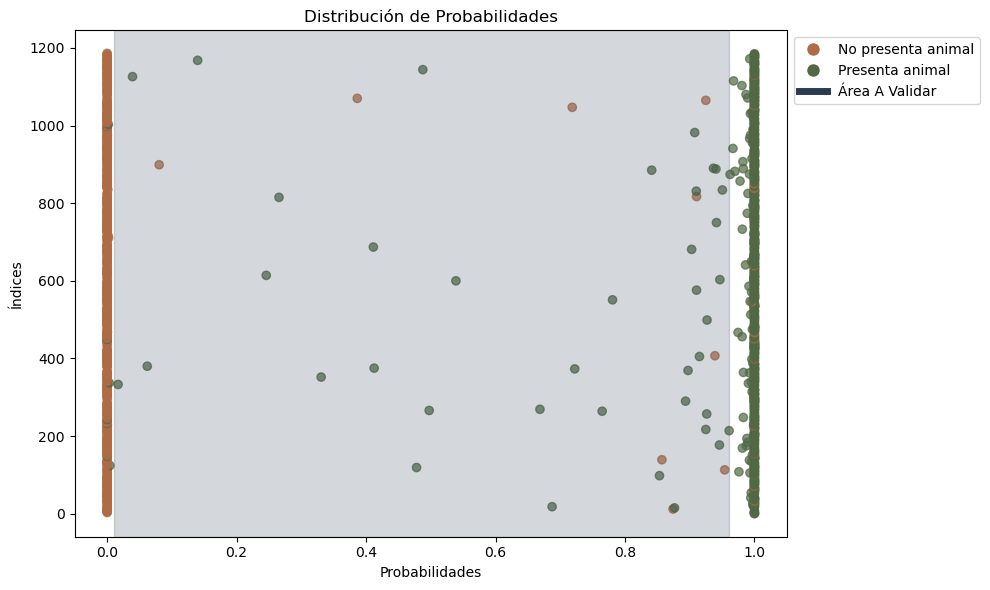

In [872]:
import matplotlib.pyplot as plt

# Crear índices para el eje x
x_values = list(range(len(y_probaVGG16)))

# Crear colores basados en y_test
color = ['#AE6B44' if etiqueta == 0 else '#506944' for etiqueta in y_test]

plt.figure(figsize=(10,6))
plt.scatter(y_probaVGG16, x_values, color=color, alpha=0.7)

# Sombrear el área 'A Validar'
plt.axvspan(umbral_inf_optimo, umbral_sup_optimo, alpha=0.2, color=colores[0], label='Área A Validar')

plt.title('Distribución de Probabilidades')
plt.xlabel('Probabilidades')
plt.ylabel('Índices')

# Añadir leyenda fuera del gráfico
from matplotlib.lines import Line2D
leyenda_elems = [Line2D([0], [0], marker='o', color='w', label='No presenta animal', markersize=10, markerfacecolor='#AE6B44'),
                 Line2D([0], [0], marker='o', color='w', label='Presenta animal', markersize=10, markerfacecolor='#506944'),
                Line2D([0], [0], marker='None', color=colores[0], label='Área A Validar', linewidth=5)]
plt.legend(handles=leyenda_elems, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

In [349]:
# Porcentaje de imagenes debajo del umbral inferior
print(f"Porcentaje de imagenes debajo del umbral inferior: {round(np.sum(y_probaVGG16 < umbral_inf_optimo) * 100 / len(y_test),2)}%")

Porcentaje de imagenes debajo del umbral inferior: 46.5%


In [660]:
# Porcentaje de imagenes debajo del umbral inferior mal etiquetadas
print(f"Porcentaje de imagenes debajo del umbral inferior mal etiquetadas: {round(np.sum((y_probaVGG16.flatten() < umbral_inf_optimo) & (y_test == 1)) * 100 / np.sum((y_probaVGG16.flatten() < umbral_inf_optimo)) ,2)}%")

Porcentaje de imagenes debajo del umbral inferior mal etiquetadas: 1.45%


In [873]:
# Porcentaje de imagenes encima del umbral superior mal etiquetadas
print(f"Porcentaje de imagenes encima del umbral superior mal etiquetadas: {round(np.sum((y_probaVGG16.flatten() > umbral_sup_optimo) & (y_test == 0)) * 100 / np.sum((y_probaVGG16.flatten() > umbral_sup_optimo)) ,2)}%")

Porcentaje de imagenes debajo del umbral inferior mal etiquetadas: 2.38%


In [78]:
#  Porcentaje de imagenes que no se validan de los que no son animales
print(f"Porcentaje de imagenes que no se validan de los que no son animales: {round(np.sum((y_probaVGG16.flatten() < umbral_inf_optimo) & (y_test == 0)) * 100 / np.sum(y_test == 0),2)}%")

#  Porcentaje de imagenes que no se validan de los que son animales
print(f"Porcentaje de imagenes que no se validan de los que son animales: {round(np.sum((y_probaVGG16.flatten() > umbral_sup_optimo) & (y_test == 1)) * 100 / np.sum(y_test == 1),2)}%")

Porcentaje de imagenes que no se validan de los que no son animales: 95.94%
Porcentaje de imagenes que no se validan de los que son animales: 92.74%


In [69]:
# Porcentaje de imagenes debajo del encima del umbral superior
print(f"Porcentaje de imagenes encima del umbral superior: {round(np.sum(y_probaVGG16 > umbral_sup_optimo) * 100 / len(y_test),2)}%")

Porcentaje de imagenes encima del umbral superior: 49.62%


##### Tecnica de Lift: 
Se calcula como el cociente entre la proporción de positivos acumulados y la proporción de totales acumulados. Equivalente a comparar los positivos destacados por el modelo vs lo que cabria esperar si nos guiamos por el azar. 

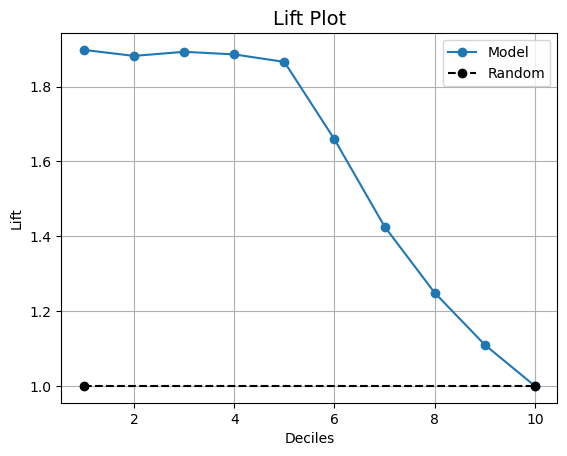

In [42]:
# Plot
kds.metrics.plot_lift(y_test, y_probaVGG16)

Interpretacion: cuantas veces le gana a la aleatoriedad en cada decil

# Guanaco vs No Guanaco

In [2]:
test = pd.read_pickle('ArchivosUtiles/testingGuanaco.pkl')

In [3]:
X_test = test['Imagen']
y_test = test['Guanaco']

In [22]:
y_test = y_test.astype(int)

In [4]:
X_test_tf = tf.convert_to_tensor(np.array([img_to_array(img) for img in X_test]))

In [6]:
modelVGG16 = load_model('ModelosFinales/modeloGuanacoVGG16.h5')
modelIV3 = load_model('ModelosFinales/modeloGuanacoIV3.h5')
modelRN50 = load_model('ModelosFinales/modeloGuanacoRN50.h5')

## Model VGG16

In [23]:
y_probaVGG16 = modelVGG16.predict(X_test_tf)
y_predVGG16 = (y_probaVGG16 >= 0.5).astype(int)

23/23 [==============================] - 20s 877ms/step


In [24]:
y_predVGG16 = y_predVGG16.flatten()

In [25]:
# Calculamos Accuracy
accuracyVGG16 = accuracy_score(y_test, y_predVGG16)
print(f"Accuracy: {accuracyVGG16}")

# Calculamos Recall
recallVGG16 = recall_score(y_test,  y_predVGG16, pos_label=1, average='binary')
print(f"Recall: {recallVGG16}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predVGG16).ravel()
specificityVGG16 = tn / (tn + fp)
print(f"Specificity: {specificityVGG16}")


Accuracy: 0.8932584269662921
Recall: 0.9105145413870246
Specificity: 0.8641509433962264


In [26]:
# Calcular average precision
apVGG16 = average_precision_score(y_test, y_probaVGG16)

print("Average Precision (AP):", apVGG16)

Average Precision (AP): 0.9477028338895824


In [27]:
print(classification_report(y_test, y_predVGG16))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       265
           1       0.92      0.91      0.91       447

    accuracy                           0.89       712
   macro avg       0.89      0.89      0.89       712
weighted avg       0.89      0.89      0.89       712



## Model Inception V3

In [28]:
y_probaIV3 = modelIV3.predict(X_test_tf)
y_predIV3 = (y_probaIV3 >= 0.5).astype(int)

23/23 [==============================] - 5s 182ms/step


In [29]:
# Calculamos Accuracy
accuracyIV3 = accuracy_score(y_test, y_predIV3)
print(f"Accuracy: {accuracyIV3}")

# Calculamos Recall
recallIV3 = recall_score(y_test, y_predIV3, pos_label=1, average='binary')
print(f"Recall: {recallIV3}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predIV3).ravel()
specificityIV3 = tn / (tn + fp)
print(f"Specificity: {specificityIV3}")

Accuracy: 0.6882022471910112
Recall: 0.9843400447427293
Specificity: 0.18867924528301888


In [30]:
# Calcular average precision
apIV3 = average_precision_score(y_test, y_probaIV3)

print("Average Precision (AP):", apIV3)

Average Precision (AP): 0.7703953488114511


In [31]:
print(classification_report(y_test, y_predIV3))

              precision    recall  f1-score   support

           0       0.88      0.19      0.31       265
           1       0.67      0.98      0.80       447

    accuracy                           0.69       712
   macro avg       0.77      0.59      0.55       712
weighted avg       0.75      0.69      0.62       712



## Model ResNet 50

In [32]:
y_probaRN50 = modelRN50.predict(X_test_tf)
y_predRN50 = (y_probaRN50 >= 0.5).astype(int)

23/23 [==============================] - 9s 362ms/step


In [33]:
# Calculamos Accuracy
accuracyRN50 = accuracy_score(y_test, y_predRN50)
print(f"Accuracy: {accuracyRN50}")

# Calculamos Recall
recallRN50 = recall_score(y_test, y_predRN50, pos_label=1, average='binary')
print(f"Recall: {recallRN50}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predRN50).ravel()
specificityRN50 = tn / (tn + fp)
print(f"Specificity: {specificityRN50}")

Accuracy: 0.9143258426966292
Recall: 0.9149888143176734
Specificity: 0.9132075471698113


In [34]:
# Calcular average precision
apRN50 = average_precision_score(y_test, y_probaRN50)

print("Average Precision (AP):", apRN50)
# 0.9408560319539679

Average Precision (AP): 0.9752708262346819


In [35]:
print(classification_report(y_test, y_predRN50))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       265
           1       0.95      0.91      0.93       447

    accuracy                           0.91       712
   macro avg       0.91      0.91      0.91       712
weighted avg       0.92      0.91      0.91       712



## Graficos

In [36]:
colores = [ '#2B3B52', '#355028', '#907766', '#25401B', '#FDFBF8']

In [37]:
# Suponiendo que tienes listas con precision, recall, F1 para cada modelo
accuracys = [accuracyVGG16, accuracyIV3, accuracyRN50]
recalls = [recallVGG16, recallIV3, recallRN50]
specificitys = [specificityVGG16, specificityIV3, specificityRN50]
aps = [apVGG16, apIV3, apRN50]

labels = ['VGG16', 'InceptionV3', 'ResNet50']

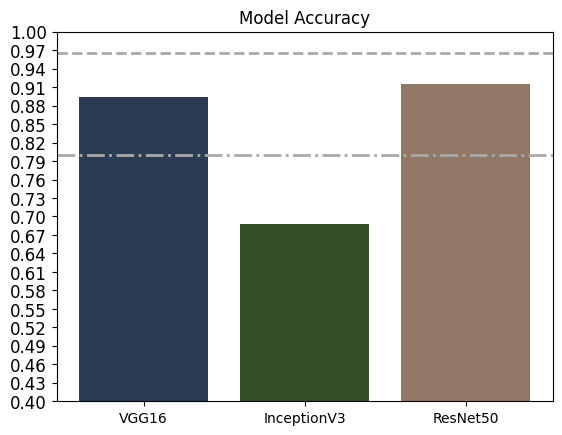

In [38]:
plt.bar(labels, accuracys, color=colores[0:3])
plt.axhline(y=0.966, color='darkgrey', linestyle='dashed', linewidth=2)
plt.axhline(y=0.8, color='darkgrey', linestyle='-.', linewidth=2)
plt.ylim([0.40, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.40, 1, 21), fontsize=12) 
plt.title('Model Accuracy')
plt.show()

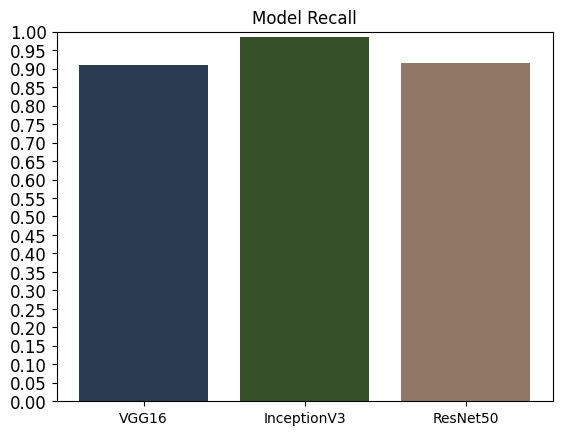

In [39]:
plt.bar(labels, recalls, color=colores[0:3])
plt.title('Model Recall')
plt.ylim([0, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0, 1, 21), fontsize=12) 
plt.show()

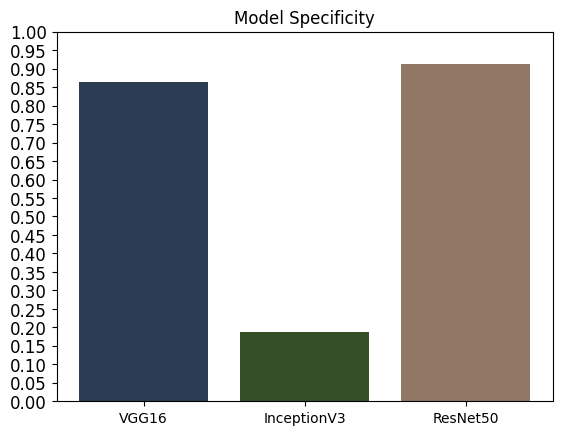

In [40]:
plt.bar(labels, specificitys, color=colores[0:3])
plt.title('Model Specificity')
plt.ylim([0, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0, 1, 21), fontsize=12) 
plt.show()

In [43]:
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_test, y_predVGG16)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)

fpr_IV3, tpr_IV3, _ = roc_curve(y_test, y_predIV3)
roc_auc_IV3 = auc(fpr_IV3, tpr_IV3)

fpr_RN50, tpr_RN50, _ = roc_curve(y_test, y_predRN50)
roc_auc_RN50 = auc(fpr_RN50, tpr_RN50)

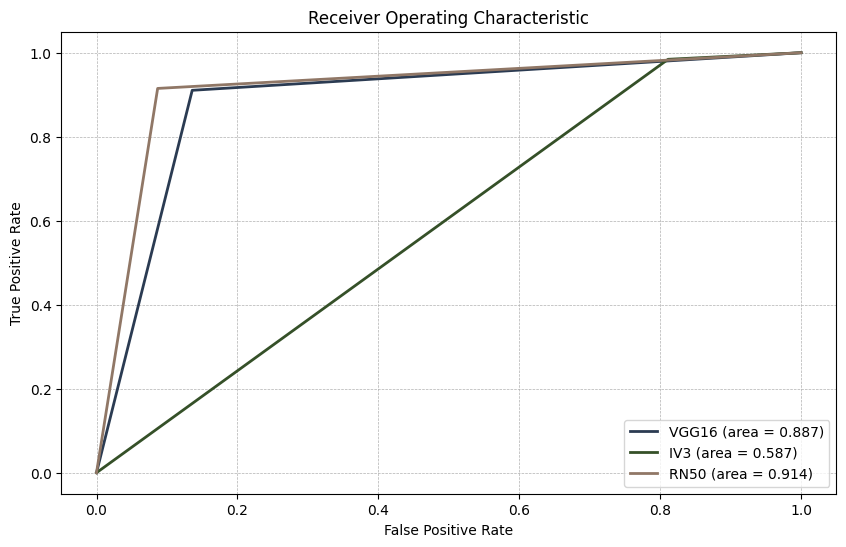

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_vgg16, tpr_vgg16, color=colores[0], label='VGG16 (area = %0.3f)' % roc_auc_vgg16, linewidth=2)
plt.plot(fpr_IV3, tpr_IV3, color=colores[1], label='IV3 (area = %0.3f)' % roc_auc_IV3, linewidth=2)
plt.plot(fpr_RN50, tpr_RN50, color=colores[2], label='RN50 (area = %0.3f)' % roc_auc_RN50, linewidth=2)  # Nota que corregí el área de RN50 que anteriormente tenía el valor de IV3

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')  # Etiqueta para el eje x
plt.ylabel('True Positive Rate')   # Etiqueta para el eje y
plt.legend(loc="lower right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Añado una rejilla para mejor visibilidad
plt.show()

In [832]:
precision_vgg16, recall_vgg16, _ = precision_recall_curve(y_test, y_predVGG16)
pr_auc_vgg16 = auc(recall_vgg16, precision_vgg16)

precision_IV3, recall_IV3, _ = precision_recall_curve(y_test, y_predIV3)
pr_auc_IV3 = auc(recall_IV3, precision_IV3)

precision_RN50, recall_RN50, _ = precision_recall_curve(y_test, y_predRN50)
pr_auc_RN50 = auc(recall_RN50, precision_RN50)

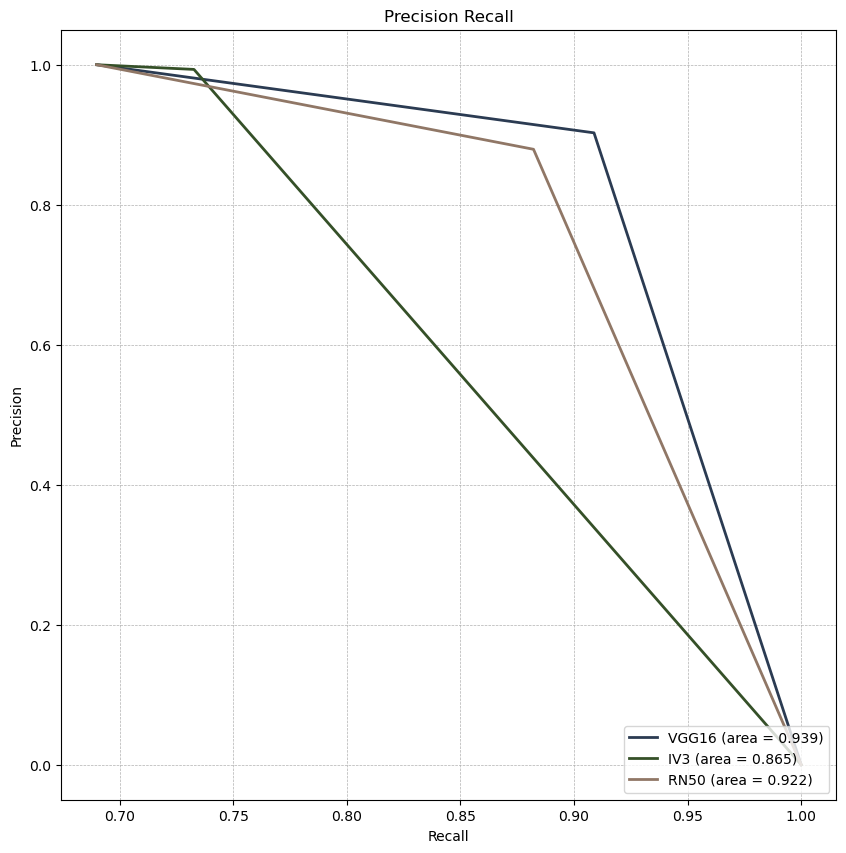

In [833]:
plt.figure(figsize=(10, 10))
plt.plot(precision_vgg16, recall_vgg16, color=colores[0], label='VGG16 (area = %0.3f)' % pr_auc_vgg16, linewidth=2)
plt.plot(precision_IV3, recall_IV3, color=colores[1], label='IV3 (area = %0.3f)' % pr_auc_IV3, linewidth=2)
plt.plot(precision_RN50, recall_RN50, color=colores[2], label='RN50 (area = %0.3f)' % pr_auc_RN50, linewidth=2)# Nota que corregí el área de RN50 que anteriormente tenía el valor de IV3

plt.title('Precision Recall')
plt.xlabel('Recall')  # Etiqueta para el eje x
plt.ylabel('Precision')   # Etiqueta para el eje y
plt.legend(loc="lower right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Añado una rejilla para mejor visibilidad
plt.show()

In [45]:
#  Funcion que busca optimizar el costo para identificar los umbrales de validacion.
def optimizar_umbral(y_test, y_proba, tarea, CFP = 1000, CFN = 300, CV = 20, TV = 0.579):
    #  Inicializacion de variables
    limInf = 0
    limSup = 1
    CostoMin = float('inf')
    Vop = 0
    V = 0
    # Determinacion de costos.
    if tarea == 'especie':
        CE = CFP + CFN
    else:
        CE = (CFP + CFN) / 2
    # Ciclo que minimizando el costo.
    # Balancea el costo generado por errores de clasificacion con el costo de validacion.
    umbral_inf = 0
    for umbral_sup in np.arange(0.5, 0.99, 0.01):
        # Determina la cantidad de imagenes que caen entre los umbrales.
        V = np.sum((y_proba >= umbral_inf) & (y_proba <= umbral_sup))
        #  Costo generado por la validacion.
        C = V * CV 
        #  Costo de Error de Validacion
        C += V * TV * CE
        #  Determina el error que conlleva no validar fuera de los umbrales.
        if tarea == 'presencia':
            #  Errores por Falsos Positivos fuera de los umbrales.
            FP = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup) & (y_test == 0))
            #  Errores por Falsos Negativos fuera de los umbrales.
            FN = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup) & (y_test == 1))
            #  Costos generados por errores de clasificacion.
            C += FP * CFP + FN * CFN
        else:
            # Errores generados.
            E = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup))
            # Costo generado por errores de clasificacion.
            C += E * CE
        # En el caso de que el costo sea menor al minimo actual, se actualiza el minimo.
        if C < CostoMin:
            Vop = V
            CostoMin = C
            limInf = umbral_inf
            limSup = umbral_sup
    
    print(f"Mejor rango de umbral: {round(limInf,2)} - {round(limSup,2)} con un costo de: ${CostoMin}")
    print(f"Validara {Vop} imagenes, correspondientes al {round(Vop * 100 / len(y_test),2)}% del total de las imagenes.")
 
    return limInf, limSup

In [46]:
umbral_inf_optimo, umbral_sup_optimo = optimizar_umbral(y_test, y_probaVGG16.ravel(),'presencia')

Mejor rango de umbral: 0 - 0.97 con un costo de: $260339.3
Validara 318 imagenes, correspondientes al 44.66% del total de las imagenes.


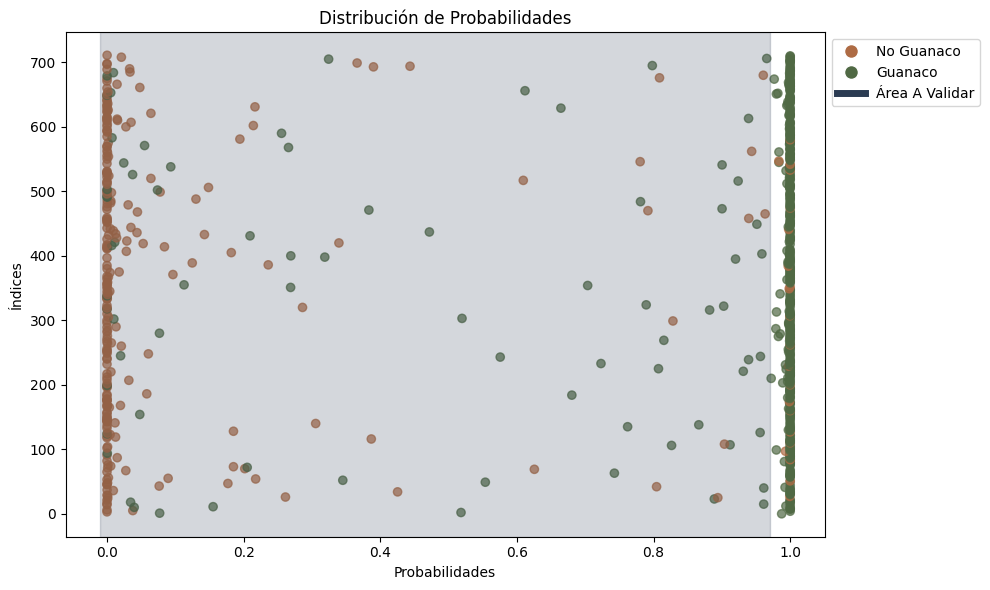

In [47]:
import matplotlib.pyplot as plt

# Crear índices para el eje x
x_values = list(range(len(y_probaVGG16)))

# Crear colores basados en y_test
color = ['#AE6B44' if etiqueta == 0 else '#506944' for etiqueta in y_test]

plt.figure(figsize=(10,6))
plt.scatter(y_probaVGG16, x_values, color=color, alpha=0.7)

# Sombrear el área 'A Validar'
plt.axvspan(umbral_inf_optimo-0.01, umbral_sup_optimo, alpha=0.2, color=colores[0], label='Área A Validar')

plt.title('Distribución de Probabilidades')
plt.xlabel('Probabilidades')
plt.ylabel('Índices')

# Añadir leyenda fuera del gráfico
from matplotlib.lines import Line2D
leyenda_elems = [Line2D([0], [0], marker='o', color='w', label='No Guanaco', markersize=10, markerfacecolor='#AE6B44'),
                 Line2D([0], [0], marker='o', color='w', label='Guanaco', markersize=10, markerfacecolor='#506944'),
                Line2D([0], [0], marker='None', color=colores[0], label='Área A Validar', linewidth=5)]
plt.legend(handles=leyenda_elems, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

In [48]:
# Porcentaje de imagenes encima del umbral superior
print(f"Porcentaje de imagenes encima del umbral superior: {round(np.sum(y_probaVGG16 > umbral_sup_optimo) * 100 / len(y_test),2)}%")

Porcentaje de imagenes encima del umbral superior: 55.34%


In [49]:
# Porcentajes de imagenes encima del umbral superior mal etiquetadas
print(f"Porcentaje de imagenes encima del umbral superior mal etiquetadas: {round(np.sum((y_probaVGG16.flatten() > umbral_sup_optimo) & (y_test == 0)) * 100 / np.sum((y_probaVGG16.flatten() > umbral_sup_optimo)),2)}%")

Porcentaje de imagenes encima del umbral superior mal etiquetadas: 5.84%


##### Tecnica de Lift: 
Se calcula como el cociente entre la proporción de positivos acumulados y la proporción de totales acumulados. Equivalente a comparar los positivos destacados por el modelo vs lo que cabria esperar si nos guiamos por el azar. 

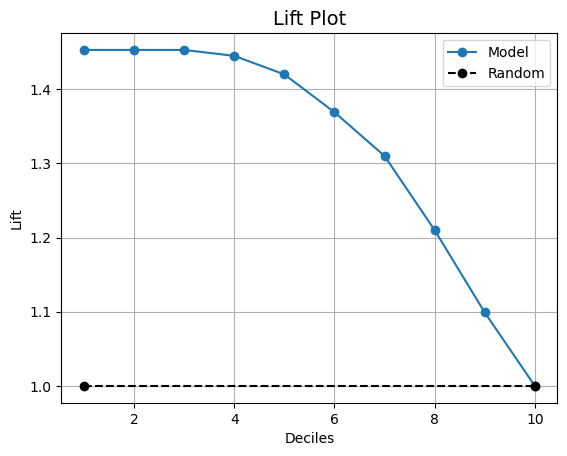

In [50]:
# Plot
kds.metrics.plot_lift(y_test, y_probaVGG16)

# Prediccion de Animales Aislados:

In [99]:
data = pd.read_csv('ArchivosUtiles/megadetector-results_previously_classified.csv')

In [100]:
# Renombrar file por Ruta
data.rename(columns={'file':'Ruta'}, inplace=True)

In [101]:
#  Se filtran las detecciones con confianza mayor a 0.5
data = data[data['confidence'] > 0.2]

In [102]:
#  Se agrupa la cantidad de detecciones por imagen
agrupada = data.groupby('Ruta').size().reset_index(name='Cant_pred')

In [103]:
#  Le asigna la confianza promedio a cada imagen de tener cantidad 1.
agrupada['y_proba'] = (agrupada['Cant_pred'] == 1) * data.groupby('Ruta')['confidence'].mean().reset_index(drop=True) + (1 - (agrupada['Cant_pred'] == 1)) * (1 - data.groupby('Ruta')['confidence'].mean().reset_index(drop=True))

In [104]:
#  Se determinan los que estan solos.
agrupada['y_pred'] = (agrupada['Cant_pred'] == 1)

In [105]:
#  Convierte a entero 1 y 0
agrupada['y_pred'] = agrupada['y_pred'].astype(int)

In [106]:
#  Proporcion de imagenes que no se validan.
print(f"Proporcion de imagenes que no se validan: {round(np.sum(agrupada['y_pred'] == 1) * 100 / len(agrupada),2)}%")

Proporcion de imagenes que no se validan: 45.9%


In [107]:
df = pd.read_csv('../ArchivosUtiles/df_normalizado.csv')

In [108]:
# Renombrar file por Ruta
df.rename(columns={'Cantidad':'Cant_test'}, inplace=True)

In [109]:
df = df[['Ruta', 'Cant_test','Especie']]

In [110]:
#  Se determinan los que estan solos.
df['y_test'] = df['Cant_test'].apply(lambda x: 1 if x == 1 else 0)

In [111]:
# Join entre agrupada y df segun Ruta y file
agrupada = agrupada.merge(df, on='Ruta', how='inner')

In [112]:
agrupada

,Ruta,Cant_pred,y_proba,y_pred,Cant_test,Especie,y_test
0,Muestreo ct Iberica/2021/IB1/0-IB1- (1000).JPG,1,0.3410,1,1.0,guanaco,1
1,Muestreo ct Iberica/2021/IB1/0-IB1- (1010).JPG,1,0.8800,1,1.0,guanaco,1
2,Muestreo ct Iberica/2021/IB1/0-IB1- (1050).JPG,1,0.8830,1,1.0,zorro colorado,1
3,Muestreo ct Iberica/2021/IB1/0-IB1- (1055).JPG,3,0.1260,0,3.0,guanaco,0
4,Muestreo ct Iberica/2021/IB1/0-IB1- (1076).JPG,2,0.3015,0,3.0,guanaco,0
...,...,...,...,...,...,...,...
2103,Muestreo ct sauce/CT S 2022/S4/IMG_4231.JPG,1,0.5240,1,2.0,guanaco,0
2104,Muestreo ct sauce/CT S 2022/S5/1/1 - S5 - (11)...,2,0.2215,0,2.0,guanaco,0
2105,Muestreo ct sauce/CT S 2022/S7/1/IMG_0032.JPG,1,0.3370,1,1.0,guanaco,1
2106,Muestreo ct sauce/CT S 2022/S7/1/IMG_0046.JPG,1,0.9660,1,1.0,guanaco,1


In [113]:
y_test = agrupada['y_test']
y_predMegadet = agrupada['y_pred']
y_probaMegadet = agrupada['y_proba']

In [114]:
# Calculamos Accuracy
accuracyMegadet = accuracy_score(y_test, y_predMegadet)
print(f"Accuracy: {accuracyMegadet}")

# Calculamos Recall
recallMegadet = recall_score(y_test,  y_predMegadet, pos_label=1, average='binary')
print(f"Recall: {recallMegadet}")

# Calculamos Precision
precisionMegadet = precision_score(y_test,  y_predMegadet, pos_label=1, average='binary')
print(f"Precision: {precisionMegadet}")

# Accuracy: 0.9074952561669829
# Recall: 0.8697318007662835
# Precision: 0.9389865563598759

Accuracy: 0.9074952561669829
Recall: 0.8697318007662835
Precision: 0.9389865563598759


In [115]:
# Calcular average precision
apMegadet = average_precision_score(y_test, y_probaMegadet)

print("Average Precision (AP):", apMegadet)

Average Precision (AP): 0.9437198128386329


In [116]:
print(classification_report(y_test, y_predMegadet))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1064
           1       0.94      0.87      0.90      1044

    accuracy                           0.91      2108
   macro avg       0.91      0.91      0.91      2108
weighted avg       0.91      0.91      0.91      2108



In [68]:
test = pd.read_pickle('ArchivosUtiles/testingAislado.pkl')

In [69]:
X_test = test['Imagen']
y_test = test['Aislado']

In [70]:
X_test_tf = tf.convert_to_tensor(np.array([img_to_array(img) for img in X_test]))

In [71]:
modelVGG16 = load_model('ModelosFinales/modeloAisladoVGG16.h5')
modelIV3 = load_model('ModelosFinales/modeloAisladoIV3.h5')
modelRN50 = load_model('ModelosFinales/modeloAisladoRN50.h5')

## Model VGG16

In [74]:
y_probaVGG16.shape

(712, 1)

In [75]:
y_probaVGG16 = modelVGG16.predict(X_test_tf)
y_predVGG16 = (y_probaVGG16 >= 0.5).astype(int)

13/13 [==============================] - 12s 901ms/step


In [76]:
# Calculamos Accuracy
accuracyVGG16 = accuracy_score(y_test, y_predVGG16)
print(f"Accuracy: {accuracyVGG16}")

# Calculamos Recall
recallVGG16 = recall_score(y_test,  y_predVGG16, pos_label=1, average='binary')
print(f"Recall: {recallVGG16}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predVGG16).ravel()
specificityVGG16 = tn / (tn + fp)
print(f"Specificity: {specificityVGG16}")


Accuracy: 0.6265060240963856
Recall: 0.6811594202898551
Specificity: 0.5721153846153846


In [77]:
# Calcular average precision
apVGG16 = average_precision_score(y_test, y_probaVGG16)

print("Average Precision (AP):", apVGG16)

Average Precision (AP): 0.6180842462478399


In [78]:
print(classification_report(y_test, y_predVGG16))

              precision    recall  f1-score   support

           0       0.64      0.57      0.61       208
           1       0.61      0.68      0.65       207

    accuracy                           0.63       415
   macro avg       0.63      0.63      0.63       415
weighted avg       0.63      0.63      0.63       415



## Model Inception V3

In [79]:
y_probaIV3 = modelIV3.predict(X_test_tf)
y_predIV3 = (y_probaIV3 >= 0.5).astype(int)

13/13 [==============================] - 3s 175ms/step


In [80]:
# Calculamos Accuracy
accuracyIV3 = accuracy_score(y_test, y_predIV3)
print(f"Accuracy: {accuracyIV3}")

# Calculamos Recall
recallIV3 = recall_score(y_test, y_predIV3, pos_label=1, average='binary')
print(f"Recall: {recallIV3}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predIV3).ravel()
specificityIV3 = tn / (tn + fp)
print(f"Specificity: {specificityIV3}")

Accuracy: 0.6216867469879518
Recall: 0.5942028985507246
Specificity: 0.6490384615384616


In [81]:
# Calcular average precision
apIV3 = average_precision_score(y_test, y_probaIV3)

print("Average Precision (AP):", apIV3)

Average Precision (AP): 0.6358283036138623


In [82]:
print(classification_report(y_test, y_predIV3))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       208
           1       0.63      0.59      0.61       207

    accuracy                           0.62       415
   macro avg       0.62      0.62      0.62       415
weighted avg       0.62      0.62      0.62       415



## Model ResNet 50

In [83]:
y_probaRN50 = modelRN50.predict(X_test_tf)
y_predRN50 = (y_probaRN50 >= 0.5).astype(int)

13/13 [==============================] - 5s 370ms/step


In [84]:
# Calculamos Accuracy
accuracyRN50 = accuracy_score(y_test, y_predRN50)
print(f"Accuracy: {accuracyRN50}")

# Calculamos Recall
recallRN50 = recall_score(y_test, y_predRN50, pos_label=1, average='binary')
print(f"Recall: {recallRN50}")

# Calculamos Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predRN50).ravel()
specificityRN50 = tn / (tn + fp)
print(f"Specificity: {specificityRN50}")

Accuracy: 0.6602409638554216
Recall: 0.5845410628019324
Specificity: 0.7355769230769231


In [85]:
# Calcular average precision
apRN50 = average_precision_score(y_test, y_probaRN50)

print("Average Precision (AP):", apRN50)
# 0.9408560319539679

Average Precision (AP): 0.6787686935804251


In [86]:
print(classification_report(y_test, y_predRN50))

              precision    recall  f1-score   support

           0       0.64      0.74      0.68       208
           1       0.69      0.58      0.63       207

    accuracy                           0.66       415
   macro avg       0.66      0.66      0.66       415
weighted avg       0.66      0.66      0.66       415



## Graficos

In [87]:
colores = [ '#2B3B52', '#355028', '#907766', '#B3CA9B', '#FDFBF8']

In [88]:
# Suponiendo que tienes listas con precision, recall, F1 para cada modelo
accuracys = [accuracyVGG16, accuracyIV3, accuracyRN50, accuracyMegadet]
recalls = [recallVGG16, recallIV3, recallRN50, recallMegadet]
specificitys = [specificityVGG16, specificityIV3, specificityRN50, recallMegadet]
aps = [apVGG16, apIV3, apRN50, apMegadet]

labels = ['VGG16', 'InceptionV3', 'ResNet50', 'Megadetector']

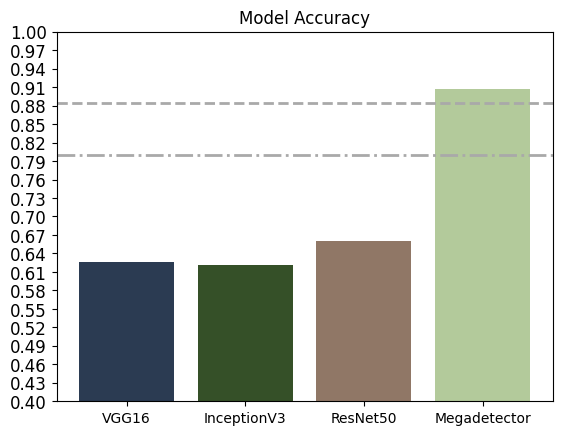

In [89]:
plt.bar(labels, accuracys, color=colores[0:4])
plt.axhline(y=0.8843, color='darkgrey', linestyle='dashed', linewidth=2)
plt.axhline(y=0.8, color='darkgrey', linestyle='-.', linewidth=2)
plt.ylim([0.40, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.40, 1, 21), fontsize=12) 
plt.title('Model Accuracy')
plt.show()

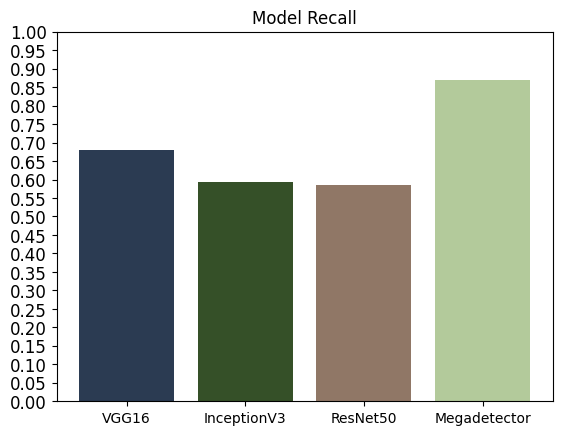

In [90]:
plt.bar(labels, recalls, color=colores[0:4])
plt.title('Model Recall')
plt.ylim([0, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0, 1, 21), fontsize=12) 
plt.show()

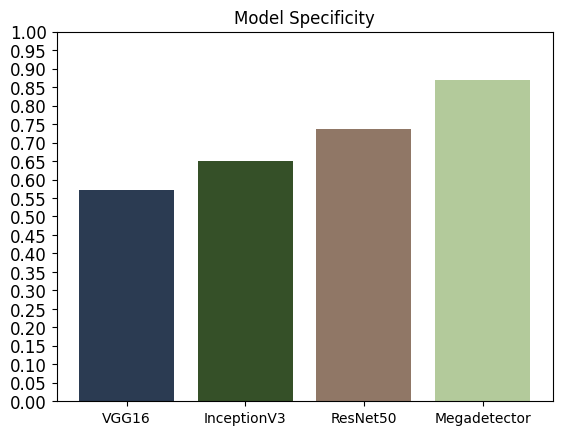

In [91]:
plt.bar(labels, specificitys, color=colores[0:4])
plt.title('Model Specificity')
plt.ylim([0, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0, 1, 21), fontsize=12) 
plt.show()

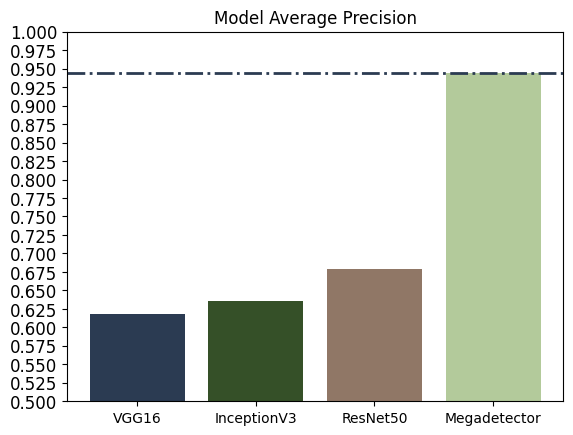

In [92]:
plt.bar(labels, aps, color=colores[0:4])
plt.title('Model Average Precision')
plt.axhline(y=max(aps), color=colores[0], linestyle='-.', linewidth=2)
plt.ylim([0.5, 1])  # Ajusta los valores según tus datos
plt.yticks(np.linspace(0.5, 1, 21), fontsize=12) 
plt.show()

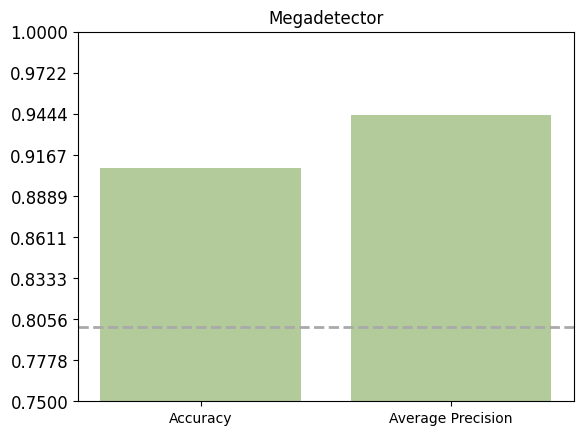

In [93]:
plt.bar(['Accuracy','Average Precision'], [accuracyMegadet,apMegadet], color='#B3CA9B')
plt.axhline(y=0.8, color='darkgrey', linestyle='dashed', linewidth=2)
plt.ylim([0.75, 1]) 
plt.yticks(np.linspace(0.75, 1, 10), fontsize=12) 
plt.title('Megadetector')
plt.show()

In [117]:
#  Funcion que busca optimizar el costo para identificar los umbrales de validacion.
def optimizar_umbral(y_test, y_proba, tarea, CFP = 1000, CFN = 300, CV = 20, TV = 0.579):
    #  Inicializacion de variables
    limInf = 0
    limSup = 1
    CostoMin = float('inf')
    Vop = 0
    V = 0
    # Determinacion de costos.
    if tarea == 'especie':
        CE = CFP + CFN
    else:
        CE = (CFP + CFN) / 2
    # Ciclo que minimizando el costo.
    # Balancea el costo generado por errores de clasificacion con el costo de validacion.
    umbral_inf = 0
    for umbral_sup in np.arange(0.5, 0.99, 0.01):
        # Determina la cantidad de imagenes que caen entre los umbrales.
        V = np.sum((y_proba >= umbral_inf) & (y_proba <= umbral_sup))
        #  Costo generado por la validacion.
        C = V * CV 
        #  Costo de Error de Validacion
        C += V * TV * CE
        #  Determina el error que conlleva no validar fuera de los umbrales.
        if tarea == 'presencia':
            #  Errores por Falsos Positivos fuera de los umbrales.
            FP = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup) & (y_test == 0))
            #  Errores por Falsos Negativos fuera de los umbrales.
            FN = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup) & (y_test == 1))
            #  Costos generados por errores de clasificacion.
            C += FP * CFP + FN * CFN
        else:
            # Errores generados.
            E = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup))
            # Costo generado por errores de clasificacion.
            C += E * CE
        # En el caso de que el costo sea menor al minimo actual, se actualiza el minimo.
        if C < CostoMin:
            Vop = V
            CostoMin = C
            limInf = umbral_inf
            limSup = umbral_sup
    
    print(f"Mejor rango de umbral: {round(limInf,2)} - {round(limSup,2)} con un costo de: ${CostoMin}")
    print(f"Validara {Vop} imagenes, correspondientes al {round(Vop * 100 / len(y_test),2)}% del total de las imagenes.")
 
    return limInf, limSup

In [118]:
umbral_inf_optimo, umbral_sup_optimo = optimizar_umbral(y_test, y_probaMegadet.ravel(),'presencia')

Mejor rango de umbral: 0 - 0.69 con un costo de: $782821.45
Validara 1227 imagenes, correspondientes al 58.21% del total de las imagenes.


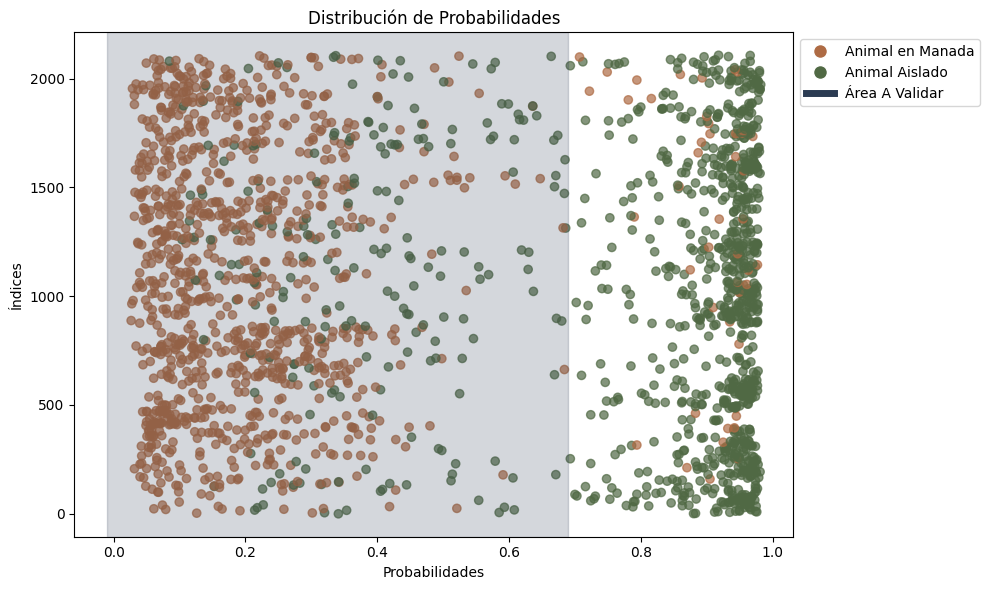

In [119]:
import matplotlib.pyplot as plt

# Crear índices para el eje x
x_values = list(range(len(y_probaMegadet)))

# Crear colores basados en y_test
color = ['#AE6B44' if etiqueta == 0 else '#506944' for etiqueta in y_test]

plt.figure(figsize=(10,6))
plt.scatter(y_probaMegadet, x_values, color=color, alpha=0.7)

# Sombrear el área 'A Validar'
plt.axvspan(umbral_inf_optimo-0.01, umbral_sup_optimo, alpha=0.2, color=colores[0], label='Área A Validar')

plt.title('Distribución de Probabilidades')
plt.xlabel('Probabilidades')
plt.ylabel('Índices')

# Añadir leyenda fuera del gráfico
from matplotlib.lines import Line2D
leyenda_elems = [Line2D([0], [0], marker='o', color='w', label='Animal en Manada', markersize=10, markerfacecolor='#AE6B44'),
                 Line2D([0], [0], marker='o', color='w', label='Animal Aislado', markersize=10, markerfacecolor='#506944'),
                Line2D([0], [0], marker='None', color=colores[0], label='Área A Validar', linewidth=5)]
plt.legend(handles=leyenda_elems, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

In [120]:
# Porcentaje de imagenes encima del umbral superior
print(f"Porcentaje de imagenes encima del umbral superior: {round(np.sum(y_probaMegadet > umbral_sup_optimo) * 100 / len(y_test),2)}%")

Porcentaje de imagenes encima del umbral superior: 41.79%


In [121]:
# Porcentaje de imagenes encima del umbral superior mal etiquetadas
print(f"Porcentaje de imagenes encima del umbral superior mal etiquetadas: {round(np.sum((y_probaMegadet > umbral_sup_optimo) & (y_test == 0)) * 100 / np.sum((y_probaMegadet > umbral_sup_optimo)),2)}%")

Porcentaje de imagenes encima del umbral superior mal etiquetadas: 5.22%


In [122]:
# Porcentaje de imagenes debajo del umbral superior mal etiquetadas
print(f"Porcentaje de imagenes debajo del umbral inferior mal etiquetadas: {round(np.sum((y_probaMegadet < 0.3) & (y_test == 1)),2)}%")

Porcentaje de imagenes debajo del umbral inferior mal etiquetadas: 65%


In [709]:
#  Porcentaje de imagenes que no se validan de los que son aislados
print(f"Porcentaje de imagenes que no se validan de los que no son guanacos: {round(np.sum((y_probaMegadet > umbral_sup_optimo) & (y_test == 1)) * 100 / np.sum(y_test == 1),2)}%")

Porcentaje de imagenes que no se validan de los que no son aislados: 79.98%


# Prediccion de Cantidades:

In [874]:
data = pd.read_csv('ArchivosUtiles/megadetector-results_previously_classified.csv')

In [875]:
# Renombrar file por Ruta
data.rename(columns={'file':'Ruta'}, inplace=True)

In [876]:
#  Se filtran las detecciones con confianza mayor a 0.5
data = data[data['confidence'] > 0.2]

In [877]:
#  Se agrupa la cantidad de detecciones por imagen
agrupada = data.groupby('Ruta').size().reset_index(name='Cant_pred')

In [878]:
#  Le asigna la confianza promedio a cada imagen de tener cantidad 1.
agrupada['y_proba'] = data.groupby('Ruta')['confidence'].mean().reset_index(drop=True)

In [879]:
#  Se determinan los que estan solos.
agrupada['y_pred'] = agrupada['Cant_pred']

In [880]:
df = pd.read_csv('../ArchivosUtiles/df_normalizado.csv')

In [881]:
# Renombrar file por Ruta
df.rename(columns={'Cantidad':'y_test'}, inplace=True)

In [882]:
df = df[['Ruta', 'y_test','Especie']]

In [883]:
# Join entre agrupada y df segun Ruta y file
agrupada = agrupada.merge(df, on='Ruta', how='inner')

In [884]:
agrupada

,Ruta,Cant_pred,y_proba,y_pred,y_test,Especie
0,Muestreo ct Iberica/2021/IB1/0-IB1- (1000).JPG,1,0.3410,1,1.0,guanaco
1,Muestreo ct Iberica/2021/IB1/0-IB1- (1010).JPG,1,0.8800,1,1.0,guanaco
2,Muestreo ct Iberica/2021/IB1/0-IB1- (1050).JPG,1,0.8830,1,1.0,zorro colorado
3,Muestreo ct Iberica/2021/IB1/0-IB1- (1055).JPG,3,0.8740,3,3.0,guanaco
4,Muestreo ct Iberica/2021/IB1/0-IB1- (1076).JPG,2,0.6985,2,3.0,guanaco
...,...,...,...,...,...,...
2103,Muestreo ct sauce/CT S 2022/S4/IMG_4231.JPG,1,0.5240,1,2.0,guanaco
2104,Muestreo ct sauce/CT S 2022/S5/1/1 - S5 - (11)...,2,0.7785,2,2.0,guanaco
2105,Muestreo ct sauce/CT S 2022/S7/1/IMG_0032.JPG,1,0.3370,1,1.0,guanaco
2106,Muestreo ct sauce/CT S 2022/S7/1/IMG_0046.JPG,1,0.9660,1,1.0,guanaco


In [885]:
y_test = agrupada['y_test']
y_predMegadet = agrupada['y_pred']
y_probaMegadet = agrupada['y_proba']

In [856]:
# Calculamos Accuracy
accuracyMegadet = accuracy_score(y_test, y_predMegadet)
print(f"Accuracy: {accuracyMegadet}")

# Calculamos Recall
recallMegadet = recall_score(y_test,  y_predMegadet, pos_label=1, average='weighted')
print(f"Recall: {recallMegadet}")

# Calculamos Precision
precisionMegadet = precision_score(y_test,  y_predMegadet, pos_label=1, average='weighted')
print(f"Precision: {precisionMegadet}")


Accuracy: 0.6821631878557874
Recall: 0.6821631878557874
Precision: 0.7274422134775074


/Users/anoguera/anaconda3/envs/pfa/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anoguera/anaconda3/envs/pfa/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calcular average precision
apMegadet = average_precision_score(y_test, y_probaMegadet)

print("Average Precision (AP):", apMegadet)

In [728]:
print(classification_report(y_test, y_predMegadet))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.94      0.87      0.90      1044
         2.0       0.69      0.62      0.66       512
         3.0       0.49      0.46      0.48       238
         4.0       0.39      0.41      0.40       135
         5.0       0.21      0.34      0.26        59
         6.0       0.15      0.22      0.18        36
         7.0       0.21      0.28      0.24        25
         8.0       0.07      0.12      0.09        17
         9.0       0.15      0.27      0.19        15
        10.0       0.13      0.22      0.17         9
        11.0       0.05      0.33      0.09         3
        12.0       0.00      0.00      0.00         5
        13.0       0.00      0.00      0.00         2
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         0
        17.0       0.00    

/Users/anoguera/anaconda3/envs/pfa/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anoguera/anaconda3/envs/pfa/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anoguera/anaconda3/envs/pfa/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Us

In [ ]:
#  Funcion que busca optimizar el costo para identificar los umbrales de validacion.
def optimizar_umbral(y_test, y_proba, tarea, CFP = 1000, CFN = 300, CV = 20, TV = 0.579):
    #  Inicializacion de variables
    limInf = 0
    limSup = 1
    CostoMin = float('inf')
    Vop = 0
    V = 0
    # Determinacion de costos.
    if tarea == 'especie':
        CE = CFP + CFN
    else:
        CE = (CFP + CFN) / 2
    # Ciclo que minimizando el costo.
    # Balancea el costo generado por errores de clasificacion con el costo de validacion.
    umbral_inf = 0
    for umbral_sup in np.arange(0.5, 0.99, 0.01):
        # Determina la cantidad de imagenes que caen entre los umbrales.
        V = np.sum((y_proba >= umbral_inf) & (y_proba <= umbral_sup))
        #  Costo generado por la validacion.
        C = V * CV 
        #  Costo de Error de Validacion
        C += V * TV * CE
        #  Determina el error que conlleva no validar fuera de los umbrales.
        if tarea == 'presencia':
            #  Errores por Falsos Positivos fuera de los umbrales.
            FP = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup) & (y_test == 0))
            #  Errores por Falsos Negativos fuera de los umbrales.
            FN = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup) & (y_test == 1))
            #  Costos generados por errores de clasificacion.
            C += FP * CFP + FN * CFN
        else:
            # Errores generados.
            E = np.sum((y_proba < umbral_inf) | (y_proba > umbral_sup))
            # Costo generado por errores de clasificacion.
            C += E * CE
        # En el caso de que el costo sea menor al minimo actual, se actualiza el minimo.
        if C < CostoMin:
            Vop = V
            CostoMin = C
            limInf = umbral_inf
            limSup = umbral_sup
    
    print(f"Mejor rango de umbral: {round(limInf,2)} - {round(limSup,2)} con un costo de: ${CostoMin}")
    print(f"Validara {Vop} imagenes, correspondientes al {round(Vop * 100 / len(y_test),2)}% del total de las imagenes.")
 
    return limInf, limSup

In [ ]:
umbral_inf_optimo, umbral_sup_optimo = optimizar_umbral(y_test, y_probaMegadet.ravel(),'presencia')

Mejor rango de umbral: 0 - 0.69 con un costo de: $782821.45
Validara 1227 imagenes, correspondientes al 58.21% del total de las imagenes.


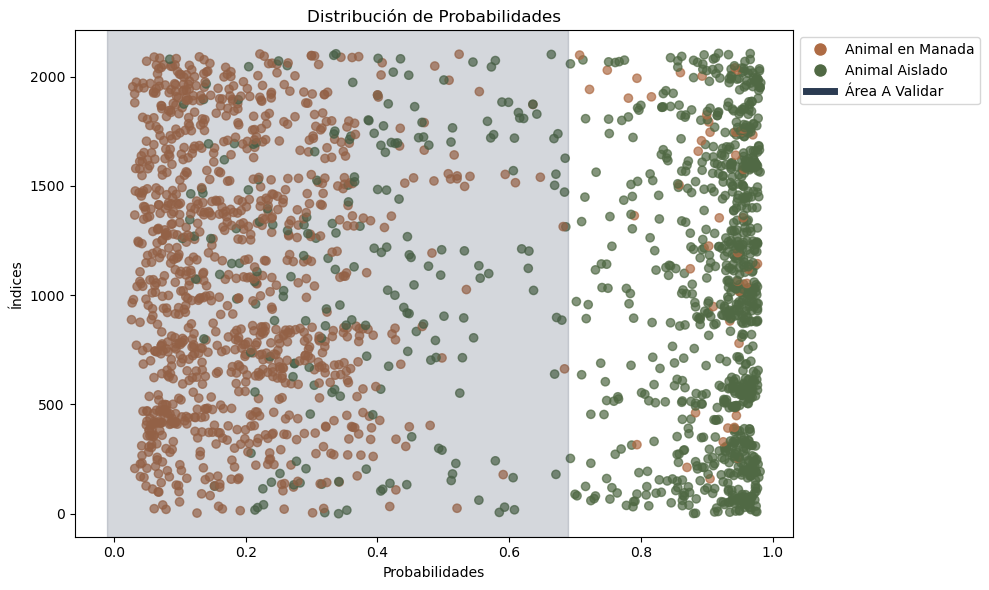

In [ ]:
import matplotlib.pyplot as plt

# Crear índices para el eje x
x_values = list(range(len(y_probaMegadet)))

# Crear colores basados en y_test
color = ['#AE6B44' if etiqueta == 0 else '#506944' for etiqueta in y_test]

plt.figure(figsize=(10,6))
plt.scatter(y_probaMegadet, x_values, color=color, alpha=0.7)

# Sombrear el área 'A Validar'
plt.axvspan(umbral_inf_optimo-0.01, umbral_sup_optimo, alpha=0.2, color=colores[0], label='Área A Validar')

plt.title('Distribución de Probabilidades')
plt.xlabel('Probabilidades')
plt.ylabel('Índices')

# Añadir leyenda fuera del gráfico
from matplotlib.lines import Line2D
leyenda_elems = [Line2D([0], [0], marker='o', color='w', label='Animal en Manada', markersize=10, markerfacecolor='#AE6B44'),
                 Line2D([0], [0], marker='o', color='w', label='Animal Aislado', markersize=10, markerfacecolor='#506944'),
                Line2D([0], [0], marker='None', color=colores[0], label='Área A Validar', linewidth=5)]
plt.legend(handles=leyenda_elems, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

In [ ]:
# Porcentaje de imagenes encima del umbral superior
print(f"Porcentaje de imagenes encima del umbral superior: {round(np.sum( > umbral_sup_optimoy_probaMegadet) * 100 / len(y_test),2)}%")

Porcentaje de imagenes encima del umbral superior: 41.79%


In [ ]:
# Porcentaje de imagenes encima del umbral superior mal etiquetadas
print(f"Porcentaje de imagenes encima del umbral superior mal etiquetadas: {round(np.sum((y_probaMegadet > umbral_sup_optimo) & (y_test == 0)) * 100 / len(y_test),2)}%")

Porcentaje de imagenes encima del umbral superior mal etiquetadas: 2.18%


In [710]:
#  Falsos Positivos fuera de los umbrales.
a = agrupada[((agrupada['y_test']!= agrupada['y_pred']) & (agrupada['y_proba'] >= 0.1)) & ((agrupada['y_test']!= agrupada['y_pred']) & (agrupada['y_proba'] < 0.4))]

In [711]:
agrupada[(agrupada['y_test']== 0) & (agrupada['y_proba'] > 0.9)]

,Ruta,Cant_pred,y_proba,y_pred,Cant_test,Especie,y_test
160,Muestreo ct Iberica/2021/IB6/1-IB6- (1591).JPG,1,0.905,1,5.0,passeriforme,0
254,Muestreo ct Iberica/2022/Ib-22 (6)/IMG_0001.JPG,1,0.947,1,2.0,martineta,0
329,Muestreo ct sauce/CT S 2020/S1/0-S1- (21).JPG,1,0.925,1,3.0,guanaco,0
392,Muestreo ct sauce/CT S 2020/S1/IMG_0021.JPG,1,0.932,1,3.0,guanaco,0
395,Muestreo ct sauce/CT S 2020/S1/IMG_0024.JPG,1,0.942,1,3.0,guanaco,0
449,Muestreo ct sauce/CT S 2020/S1/IMG_0083.JPG,1,0.945,1,2.0,guanaco,0
484,Muestreo ct sauce/CT S 2020/S1/IMG_0118.JPG,1,0.944,1,2.0,guanaco,0
780,Muestreo ct sauce/CT S 2020/S17/IMG_6142.JPG,1,0.949,1,2.0,guanaco,0
882,Muestreo ct sauce/CT S 2020/S18/z-S18 (1726).JPG,1,0.935,1,3.0,guanaco,0
948,Muestreo ct sauce/CT S 2020/S19/z-S19 (1541).JPG,1,0.910,1,2.0,guanaco,0


In [623]:
a.to_csv('CheckCantidad.csv')

In [670]:
a = ['Muestreo ct sauce/CT S 2020/S17/IMG_5830.JPG',
'Muestreo ct sauce/CT S 2020/S17/IMG_6112.JPG',
'Muestreo ct sauce/CT S 2020/S17/S17 - (1956).JPG',
'Muestreo ct sauce/CT S 2020/S17/S17 - (921).JPG',
'Muestreo ct sauce/CT S 2020/S4/z-S4 (91).JPG',
'Muestreo ct sauce/CT S 2020/S17/IMG_3211.JPG',
'Muestreo ct sauce/CT S 2020/S17/IMG_5492.JPG',
'Muestreo ct sauce/CT S 2020/S16/z-S16 (831).JPG',
'Muestreo ct sauce/CT S 2020/S17/S17 - (800).JPG',
'Muestreo ct sauce/CT S 2020/S17/IMG_0317.JPG',
'Muestreo ct sauce/CT S 2020/S16/z-S16 (1156).JPG',
'Muestreo ct sauce/CT S 2020/S16/z-S16 (1161).JPG',
'Muestreo ct sauce/CT S 2021/S13/1-S13- (74).JPG',
'Muestreo ct sauce/CT S 2021/S13/1-S13- (790).JPG',
'Muestreo ct sauce/CT S 2021/S13/1-S13- (790).JPG',
'Muestreo ct sauce/CT S 2021/S13/1-S13- (797).JPG',
'Muestreo ct sauce/CT S 2021/S16/1-S16- (46).JPG',
'Muestreo ct sauce/CT S 2021/S16/1-S16- (496).JPG',
'Muestreo ct sauce/CT S 2021/S17/1-S17- (4376).JPG'
]

In [671]:
# filtrar del datast trainingGuanaco.pkl las imagenes que estan en la lista a
train = pd.read_pickle('ArchivosUtiles/trainingGuanaco.pkl')
train = train.loc[~train['Ruta'].isin(a)]

In [672]:
train.to_pickle('ArchivosUtiles/trainingGuanaco.pkl')

In [673]:
# filtrar del datast testingGuanaco.pkl las imagenes que estan en la lista a
test = pd.read_pickle('ArchivosUtiles/testingGuanaco.pkl')
test = test.loc[~test['Ruta'].isin(a)]

In [674]:
test.to_pickle('ArchivosUtiles/testingGuanaco.pkl')